In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

dataset = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

loader = DataLoader(dataset, batch_size=64, shuffle=True)


100%|██████████| 170M/170M [00:01<00:00, 90.7MB/s]


In [3]:
class EncoderDecoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = EncoderDecoder().to(device)
criterion = nn.L1Loss()   # you can switch to nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0002)


In [5]:
epochs = 5

for epoch in range(epochs):
    total_loss = 0
    for imgs, _ in loader:
        imgs = imgs.to(device)

        outputs = model(imgs)
        loss = criterion(outputs, imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {total_loss/len(loader):.4f}")


Epoch [1/5] Loss: 0.0868
Epoch [2/5] Loss: 0.0470
Epoch [3/5] Loss: 0.0376
Epoch [4/5] Loss: 0.0330
Epoch [5/5] Loss: 0.0302


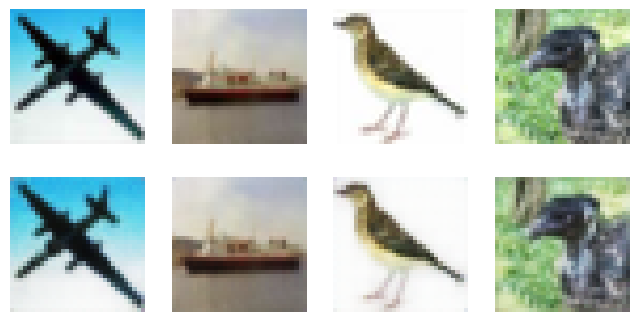

In [6]:
model.eval()
imgs, _ = next(iter(loader))
imgs = imgs.to(device)

with torch.no_grad():
    outputs = model(imgs)

imgs = (imgs.cpu() + 1) / 2
outputs = (outputs.cpu() + 1) / 2

plt.figure(figsize=(8,4))

for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow(imgs[i].permute(1,2,0))
    plt.axis("off")

    plt.subplot(2,4,i+5)
    plt.imshow(outputs[i].permute(1,2,0))
    plt.axis("off")

plt.show()
